In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import numpy as np
import warnings # Suppress all warnings 
warnings.filterwarnings("ignore")

In [3]:
data = '../data/clean/fema_df_coords.csv'

In [13]:
fema_df = pd.read_csv(data)
fema_df.drop(columns = 'Unnamed: 0', inplace = True)
fema_df

,disasterNumber,state,year,incidentType,designatedArea,disaster_area,EOC,Disaster Lat,Disaster Lng,EOC Lat,EOC Lng,Distance (km),Duration (minutes)
0,5530,NV,2024,Fire,Washoe (County),"Washoe County, NV","Carson City Hub, NV",40.560839,-119.603549,39.151340,-119.741247,250.342,221.866667
1,5529,OR,2024,Fire,Washington (County),"Washington County, OR","Olympia Hub, WA",45.546962,-123.138602,47.038257,-122.901219,223.795,133.516667
2,5528,OR,2024,Fire,Jefferson (County),"Jefferson County, OR","Olympia Hub, WA",44.667332,-121.178579,47.038257,-122.901219,359.142,229.633333
3,5527,OR,2024,Fire,Deschutes (County),"Deschutes County, OR","Olympia Hub, WA",43.832510,-121.261654,47.038257,-122.901219,470.411,313.866667
4,5526,CO,2024,Fire,Jefferson (County),"Jefferson County, CO","Denver Hub, CO",39.580030,-105.266293,39.740402,-104.997531,43.354,35.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47771,1305,NH,2000,Hurricane,Belknap (County),"Belknap County, NH","Montpelier Hub, VT",43.502425,-71.407394,44.262814,-72.582793,195.488,135.233333
47772,1305,NH,2000,Hurricane,Cheshire (County),"Cheshire County, NH","Albany Hub, NY",42.925938,-72.236379,42.684315,-73.816271,167.051,137.633333
47773,1305,NH,2000,Hurricane,Grafton (County),"Grafton County, NH","Montpelier Hub, VT",43.908793,-71.825994,44.262814,-72.582793,115.936,104.000000
47774,1304,AZ,2000,Severe Storm,Cochise (County),"Cochise County, AZ","Phoenix Hub, AZ",31.828458,-109.949686,33.456182,-111.979376,309.532,193.950000


# Most common type of disaster per state

In [33]:

# Group by state and disasterType to count occurrences
disaster_counts = fema_df.groupby(['state', 'incidentType']).size().reset_index(name='count')

# Find the most common disaster for each state
most_common_disasters = disaster_counts.loc[disaster_counts.groupby('state')['count'].idxmax()]

display(most_common_disasters)

,state,incidentType,count
0,AK,Biological,121
9,AL,Hurricane,599
16,AR,Severe Storm,555
19,AS,Biological,10
25,AZ,Fire,78
33,CA,Fire,415
43,CO,Fire,147
49,CT,Hurricane,77
55,DC,Hurricane,6
60,DE,Hurricane,21


# number of disasters per county

In [40]:
county_counts = fema_df['disaster_area'].value_counts().reset_index()
county_counts.columns = ['county', 'count']

display(county_counts)

,county,count
0,"Los Angeles County, CA",61
1,"Riverside County, CA",46
2,"Chelan County, WA",43
3,"Washoe County, NV",42
4,"Lafourche Parish, LA",41
...,...,...
4183,"T18 R11 WELS, ME",1
4184,"T18 R10 WELS, ME",1
4185,"T17 R14 WELS, ME",1
4186,"T17 R13 WELS, ME",1


# area where each incident type is most common

In [52]:
disaster_counts = fema_df.groupby(['incidentType', 'disaster_area']).size().reset_index(name='count')

# Find the most affected county for each disaster type
most_affected_counties = disaster_counts.loc[disaster_counts.groupby('incidentType')['count'].idxmax()]

display(most_affected_counties)

,incidentType,disaster_area,count
2796,Biological,"Ponca TDSA, NE",5
4146,Chemical,"Boone County, WV",1
4261,Coastal Storm,"East Feliciana Parish, LA",5
4565,Dam/Levee Break,"Gladwin County, MI",2
4572,Drought,"Chuuk County-equivalent, FM",1
4660,Earthquake,"Matanuska-Susitna Borough, AK",3
5255,Fire,"Los Angeles County, CA",48
7308,Flood,"Walsh County, ND",12
7431,Freezing,"Alachua County, FL",1
8946,Hurricane,"Lafourche Parish, LA",26


# hub utilization

In [61]:
hub_counts = fema_df.groupby('EOC')['disasterNumber'].count().reset_index(name='disaster_count')

# Step 2: Calculate total disasters
total_disasters = fema_df['disasterNumber'].count()

# Step 3: Compute percentage of utilization
hub_counts['utilization_percentage'] = (hub_counts['disaster_count'] / total_disasters) * 100

# Step 4: Sort hubs by utilization percentage
hub_counts = hub_counts.sort_values('utilization_percentage', ascending=False)

display(hub_counts)

,EOC,disaster_count,utilization_percentage
40,"Oklahoma City Hub, OK",2471,5.172053
6,"Baton Rouge Hub, LA",1796,3.759210
34,"Miami Hub, FL",1780,3.725720
37,"Nashville Hub, TN",1681,3.518503
29,"Lincoln Hub, NE",1649,3.451524
...,...,...,...
39,"Oakland Hub, CA",115,0.240707
49,"Riverside Hub, CA",114,0.238614
54,"San Francisco Hub, CA",57,0.119307
53,"San Diego Hub, CA",49,0.102562


# % of disaster type per hub

In [72]:
# Step 1: Count disasters per hub and disaster type
hub_disaster_counts = fema_df.groupby(['EOC', 'incidentType']).size().reset_index(name='count')

# Step 2: Calculate total disasters for each hub
hub_totals = fema_df.groupby('EOC').size().reset_index(name='total_count')

# Step 3: Merge totals into the grouped data
hub_disaster_counts = hub_disaster_counts.merge(hub_totals, on='EOC')

# Step 4: Compute percentages
hub_disaster_counts['percentage'] = (hub_disaster_counts['count'] / hub_disaster_counts['total_count']) * 100

# Step 5: Sort results
hub_disaster_counts = hub_disaster_counts.sort_values(['EOC', 'percentage'], ascending=[True, False])

print(hub_disaster_counts)

pivot_table = hub_disaster_counts.pivot_table(
    index='EOC',
    columns='incidentType',
    values='percentage',
    fill_value=0
)
display(pivot_table)

                 EOC  incidentType  count  total_count  percentage
7     Albany Hub, NY  Severe Storm    224          668   33.532934
4     Albany Hub, NY     Hurricane    122          668   18.263473
0     Albany Hub, NY    Biological     77          668   11.526946
8     Albany Hub, NY     Snowstorm     71          668   10.628743
5     Albany Hub, NY         Other     66          668    9.880240
..               ...           ...    ...          ...         ...
514  Trenton Hub, NJ    Biological     24          188   12.765957
520  Trenton Hub, NJ     Snowstorm     20          188   10.638298
515  Trenton Hub, NJ          Fire     11          188    5.851064
518  Trenton Hub, NJ         Other      8          188    4.255319
516  Trenton Hub, NJ         Flood      4          188    2.127660

[521 rows x 5 columns]


incidentType,Biological,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Flood,Freezing,Hurricane,...,Snowstorm,Straight-Line Winds,Terrorist,Tornado,Toxic Substances,Tropical Storm,Tsunami,Typhoon,Volcanic Eruption,Winter Storm
EOC,,,,,,,,,,,,,,,,,,,,,
"Albany Hub, NY",11.526946,0.0,0.000000,0.0,0.0,0.449102,4.940120,6.586826,0.000000,18.263473,...,10.628743,0.0,0.0,0.000000,0.0,1.047904,0.0,0.0,0.0,0.598802
"Anchorage Hub, AK",41.935484,0.0,0.806452,0.0,0.0,4.838710,8.467742,16.129032,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
"Atlanta Hub, GA",16.745442,0.0,0.000000,0.0,0.0,0.000000,1.215395,0.877785,0.000000,39.905469,...,0.000000,0.0,0.0,0.202566,0.0,7.900068,0.0,0.0,0.0,0.067522
"Augusta Hub, ME",55.813953,0.0,0.620155,0.0,0.0,0.000000,0.000000,3.255814,1.705426,6.666667,...,10.542636,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.310078
"Austin Hub, TX",13.478261,0.0,0.000000,0.0,0.0,0.000000,26.086957,10.000000,0.000000,25.652174,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2.391304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Springfield Hub, IL",22.464899,0.0,0.000000,0.0,0.0,0.000000,0.000000,14.196568,0.000000,11.232449,...,11.076443,0.0,0.0,10.764431,0.0,0.000000,0.0,0.0,0.0,0.000000
"St. Paul Hub, MN",23.650190,0.0,0.152091,0.0,0.0,0.000000,0.456274,32.015209,0.000000,9.581749,...,0.760456,0.0,0.0,1.673004,0.0,0.000000,0.0,0.0,0.0,0.076046
"Tallahassee Hub, FL",10.029940,0.0,0.000000,0.0,0.0,0.000000,2.844311,0.000000,0.598802,56.362275,...,0.000000,0.0,0.0,1.347305,0.0,14.221557,0.0,0.0,0.0,0.000000


In [80]:
fema_df['Distance (km)'].describe()

count    44980.000000
mean       192.254076
std        111.899311
min          0.740000
25%        113.635000
50%        175.397000
75%        253.014250
max       1894.053000
Name: Distance (km), dtype: float64

In [82]:
fema_df['Duration (minutes)'].describe()

count    44980.000000
mean       123.025434
std         78.010884
min          2.183333
25%         76.400000
50%        113.583333
75%        157.616667
max       4039.233333
Name: Duration (minutes), dtype: float64

In [86]:
frequency_table_hub = fema_df[['EOC']].value_counts()

EOC                  
Oklahoma City Hub, OK    2471
Baton Rouge Hub, LA      1796
Miami Hub, FL            1780
Nashville Hub, TN        1681
Lincoln Hub, NE          1649
                         ... 
Oakland Hub, CA           115
Riverside Hub, CA         114
San Francisco Hub, CA      57
San Diego Hub, CA          49
Long Beach Hub, CA         35
Name: count, Length: 62, dtype: int64

In [90]:
proportion_table_hub = fema_df[['EOC']].value_counts(normalize = True)
proportion_table_hub

EOC                  
Oklahoma City Hub, OK    0.052136
Baton Rouge Hub, LA      0.037894
Miami Hub, FL            0.037557
Nashville Hub, TN        0.035468
Lincoln Hub, NE          0.034793
                           ...   
Oakland Hub, CA          0.002426
Riverside Hub, CA        0.002405
San Francisco Hub, CA    0.001203
San Diego Hub, CA        0.001034
Long Beach Hub, CA       0.000738
Name: proportion, Length: 62, dtype: float64

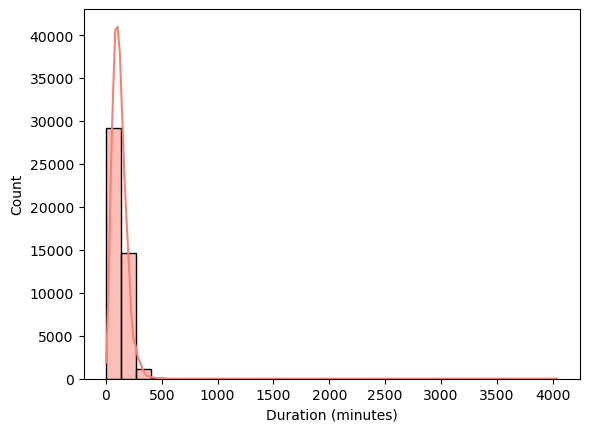

In [101]:
sns.histplot(fema_df['Duration (minutes)'], kde=True, bins=30, color="salmon");

In [105]:
fema_df['Duration (minutes)'].max()

4039.233333333333

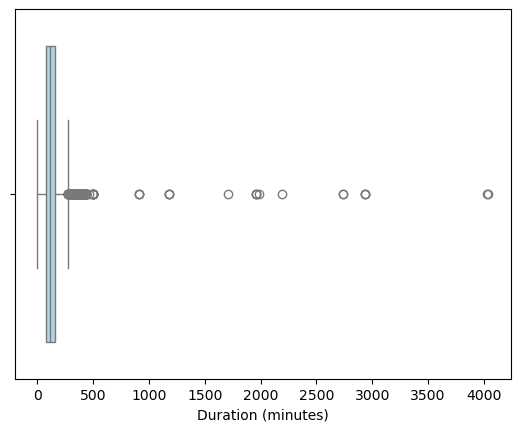

In [107]:
sns.boxplot(x = fema_df['Duration (minutes)'], color="lightblue");

In [111]:
highest_travel_time = fema_df.sort_values(by='Duration (minutes)', ascending=False).head()
highest_travel_time

,disasterNumber,state,year,incidentType,designatedArea,disaster_area,EOC,Disaster Lat,Disaster Lng,EOC Lat,EOC Lng,Distance (km),Duration (minutes)
4924,4533,AK,2020,Biological,Unalaska City School District,"Unalaska City School District, AK","Anchorage Hub, AK",53.830733,-166.541406,61.215435,-149.892953,1894.053,4039.233333
4917,4533,AK,2020,Biological,Unalaska (ANV/ANVSA),"Unalaska ANV/ANVSA, AK","Anchorage Hub, AK",53.872574,-166.537551,61.215435,-149.892953,1888.585,4027.416667
4937,4533,AK,2020,Biological,Prince of Wales-Outer Ketchikan (Census Area),"Prince of Wales-Outer Ketchikan Census Area, AK","Seattle Hub, WA",55.559599,-133.071646,47.603302,-122.333825,1313.804,2931.533333
1269,4767,AK,2024,Mud/Landslide,Prince of Wales-Hyder (Census Area),"Prince of Wales-Hyder Census Area, AK","Seattle Hub, WA",55.559599,-133.071646,47.603302,-122.333825,1313.804,2931.533333
4936,4533,AK,2020,Biological,Prince of Wales-Hyder (Census Area),"Prince of Wales-Hyder Census Area, AK","Seattle Hub, WA",55.559599,-133.071646,47.603302,-122.333825,1313.804,2931.533333


# Bivariate analysis (incident vs EOC)

In [116]:
# Generating a crosstab for 'incidentType' and 'EOC'
crosstab_result = pd.crosstab(fema_df['incidentType'], fema_df['EOC'])

crosstab_result

EOC,"Albany Hub, NY","Anchorage Hub, AK","Atlanta Hub, GA","Augusta Hub, ME","Austin Hub, TX","Baltimore Hub, MD","Baton Rouge Hub, LA","Bismarck Hub, ND","Boise Hub, ID","Carson City Hub, NV",...,"San Antonio Hub, TX","San Diego Hub, CA","San Francisco Hub, CA","Santa Fe Hub, NM","Seattle Hub, WA","Springfield Hub, IL","St. Paul Hub, MN","Tallahassee Hub, FL","Topeka Hub, KS","Trenton Hub, NJ"
incidentType,,,,,,,,,,,,,,,,,,,,,
Biological,77,104,248,360,62,76,128,180,85,77,...,130,6,8,231,75,144,311,134,192,24
Chemical,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coastal Storm,0,2,0,4,0,0,166,57,13,1,...,7,0,0,12,25,0,2,0,0,0
Dam/Levee Break,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drought,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Earthquake,3,12,0,0,0,1,0,0,0,0,...,0,1,0,0,14,0,0,0,0,0
Fire,33,21,18,0,120,4,15,12,73,88,...,172,25,15,247,161,0,6,38,13,11
Flood,44,40,13,21,46,10,131,358,42,24,...,52,6,15,51,49,91,421,0,43,4
Freezing,0,0,0,11,0,0,0,0,0,0,...,0,2,0,1,0,0,0,8,0,0


In [118]:
# Chi-square test for 'incidentType' and 'EOC'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(65155.52905617094, 0.0)

the very low p-value indicates extremely strong eidence that the relationship between incident type and EOC 
is not due to chance.

In [121]:

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.2444811929064508

this value tells us there is a moderate association between the two variables

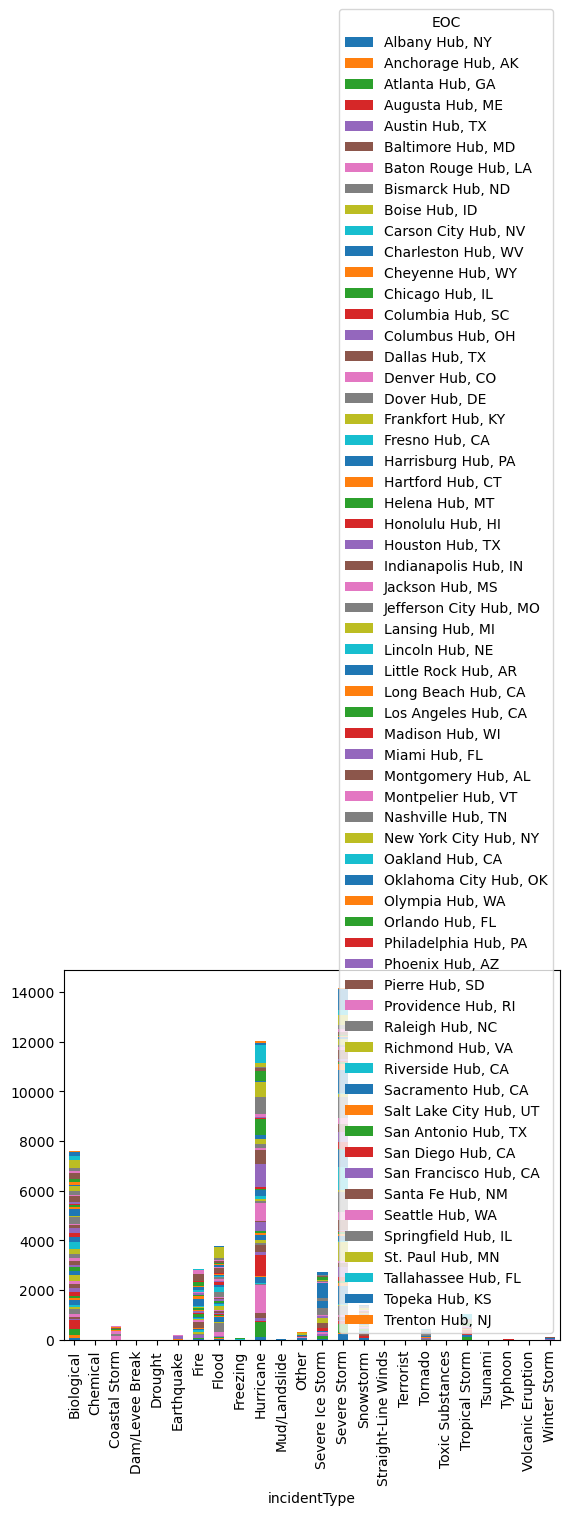

In [126]:
#Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True);

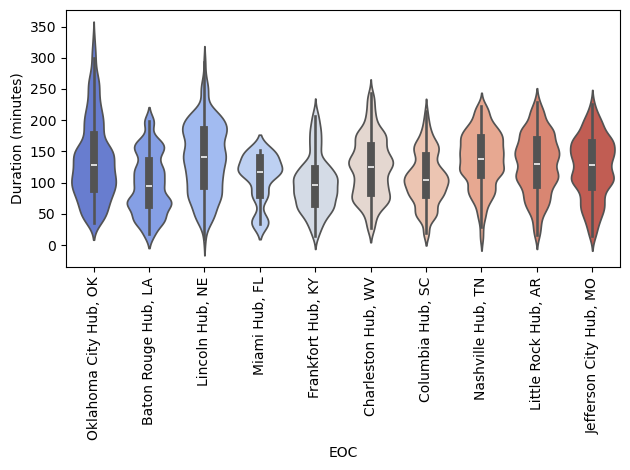

In [139]:
top_eocs = fema_df['EOC'].value_counts().head(10).index

# Filter the DataFrame to include only the top EOCs
filtered_df = fema_df[fema_df['EOC'].isin(top_eocs)]

# Create the violin plot
sns.violinplot(data=filtered_df, x='EOC', y='Duration (minutes)', palette="coolwarm", hue='EOC', legend=False)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [134]:
fema_df['Duration (minutes)'].min()

2.183333333333333

# disaster_area vs incident type

In [150]:
contingency_table = pd.crosstab(fema_df['disaster_area'], fema_df['incidentType'])
contingency_table

incidentType,Biological,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Flood,Freezing,Hurricane,...,Snowstorm,Straight-Line Winds,Terrorist,Tornado,Toxic Substances,Tropical Storm,Tsunami,Typhoon,Volcanic Eruption,Winter Storm
disaster_area,,,,,,,,,,,,,,,,,,,,,
"Abbeville County, SC",2,0,0,0,0,0,0,1,0,10,...,0,0,0,0,0,2,0,0,0,0
"Absentee Shawnee-Citizens Band of Potawatomi TJSA, OK",3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Acadia Parish, LA",2,0,3,0,0,0,0,1,0,22,...,0,0,0,0,0,0,0,0,0,0
"Accomack County, VA",2,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
"Ada County, ID",2,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zavala County, TX",2,0,0,0,0,0,2,1,0,4,...,0,0,0,0,0,0,0,0,0,0
"Zia Pueblo Indian Reservation, NM",2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Ziebach County, SD",2,0,1,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,1


In [152]:

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("There is a significant relationship between disaster area and incident type.")
else:
    print("No significant relationship between disaster area and incident type.")

Chi-Square Statistic: 166725.5421632174
P-value: 0.0
There is a significant relationship between disaster area and incident type.


In [154]:
cramers_v = np.sqrt(chi2 / (contingency_table.sum().sum() * min(contingency_table.shape) - 1))
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.381321018790953


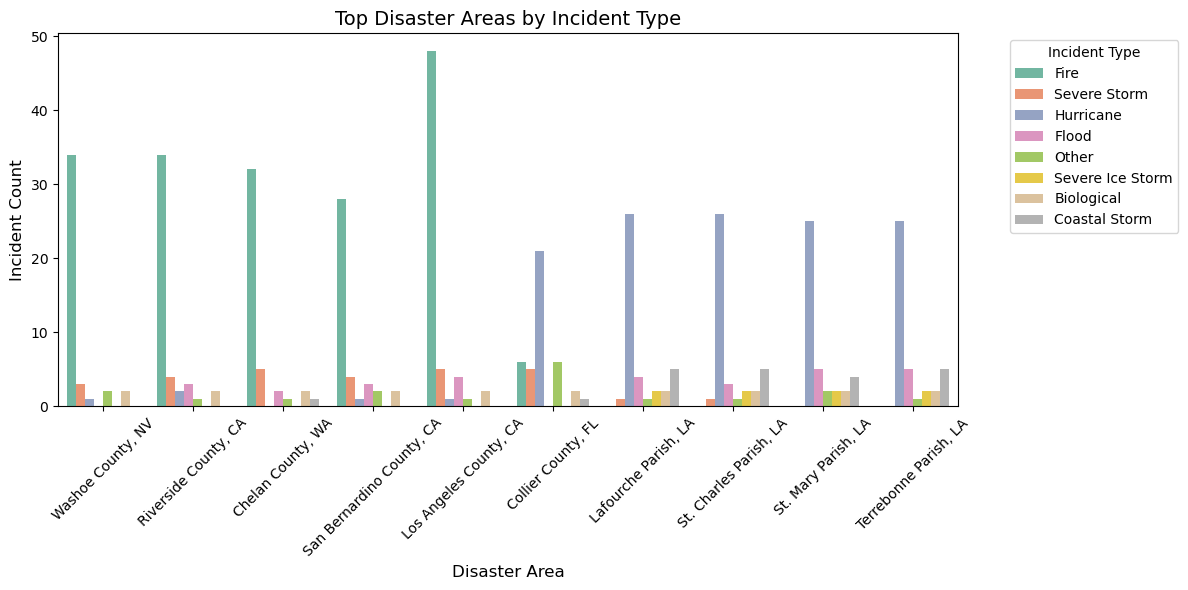

In [173]:

# Filter top disaster areas
top_areas = fema_df['disaster_area'].value_counts().head(10).index
filtered_df = fema_df[fema_df['disaster_area'].isin(top_areas)]

# Group less common incident types into "Other"
incident_counts = filtered_df['incidentType'].value_counts()
filtered_df['incidentTypeGrouped'] = filtered_df['incidentType'].apply(
    lambda x: x if incident_counts[x] > 5 else 'Other'  

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.countplot(data=filtered_df, x='disaster_area', hue='incidentTypeGrouped', palette='Set2')

# Customize the plot
plt.xticks(rotation=45, fontsize=10)
plt.title("Top Disaster Areas by Incident Type", fontsize=14)
plt.xlabel("Disaster Area", fontsize=12)
plt.ylabel("Incident Count", fontsize=12)

# Move the legend outside the plot
plt.legend(title="Incident Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [191]:
#create figures file
figures_folder = "figures"
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

# Dictionary to assign names to your figures
figure_names = {
    "incident_frequency_vs_response_time": 1,  # Replace with your actual figure numbers
    "crosstab_inctype_EOC": 2,
    "violin_duration_eoc": 3,
    "top_disaster_areas_inctype": 4
}

# Save all figures with their assigned names
for name, figure_number in figure_names.items():
    plt.figure(figure_number)
    figure_path = os.path.join(figures_folder, f"{name}.png")
    plt.savefig(figure_path, dpi=300, bbox_inches='tight')
    print(f"Figure '{name}' saved as {figure_path}")

print("All named figures have been saved.")


Figure 'incident_frequency_vs_response_time' saved as figures/incident_frequency_vs_response_time.png
Figure 'crosstab_inctype_EOC' saved as figures/crosstab_inctype_EOC.png
Figure 'violin_duration_eoc' saved as figures/violin_duration_eoc.png
Figure 'top_disaster_areas_inctype' saved as figures/top_disaster_areas_inctype.png
All named figures have been saved.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>